In [171]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [183]:
rawData = pd.read_csv("./AnomalyDetection.csv")
rawData = rawData.dropna(axis=0, how='all') #dropping rows that have all nan
print(rawData.shape)
rawData.head()

(61, 13)


,Record,Date,Time,OptionSeries,FieldType,BidPrice,BidSize,AskPrice,AskSize,TradeVolume,Price,OrderID,UnderlyingPrice
0,1,8/1/17,10:00:00.000,XYZ,NewBuy,10,10,Null,Null,Null,Null,11110000,50.00
1,2,8/1/17,10:00:00.000,XYZ,GenTrade,Null,Null,Null,Null,5,10.03,Null,50.00
2,3,8/1/17,10:00:00.001,XYZ,NewAsk,Null,Null,10.08,10,Null,Null,11110001,50.01
3,4,8/1/17,10:00:00.001,XYZ,DeleteBuy,10,10,Null,Null,Null,Null,11110000,50.01
4,5,8/1/17,10:00:00.002,XYZ,AmendAsk,Null,Null,10.07,10,Null,Null,11110001,50.02


In [184]:
rawData.tail(5)

,Record,Date,Time,OptionSeries,FieldType,BidPrice,BidSize,AskPrice,AskSize,TradeVolume,Price,OrderID,UnderlyingPrice
57,Amend Ask,when the firm change an existing field (the o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Delete Bid/Ask,when the firm's bid or ask is deleted (we tra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Best Bid/Ask,Best existing Bid or Ask in the market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Gen Trade,Trade in the market by different participants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Firm Trade,trade by our firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# For each column, print name, how many unique values, and 4 values (random order bc of set function)
for col in rawData.columns:
    print('\n ---',col, len(set(rawData[col])), list(set(rawData[col]))[0:4])
#print(*rawData.columns, sep="\n")


 --- Record 61 ['11', '9', '23', 'New Buy']

 --- Date 9 [nan, ' When the firm enters an order to sell (new order ID is assigned)', '8/1/17', ' When the firm enters an order to buy (new order ID is assigned)']

 --- Time 31 [nan, '10:00:22.012', '10:00:10.030', '10:00:15.012']

 --- OptionSeries 2 [nan, 'XYZ']

 --- FieldType 11 ['BestAsk', 'AmendAsk', 'DeleteAsk', 'AmendBuy']

 --- BidPrice 9 [nan, '10.01', 'Null', '10.04']

 --- BidSize 10 ['20', nan, 'Null', '60']

 --- AskPrice 10 [nan, '10.04', 'Null', '10.01']

 --- AskSize 10 ['20', nan, 'Null', '40']

 --- TradeVolume 7 ['20', nan, 'Null', '40']

 --- Price 9 [nan, '10.04', 'Null', '10.01']

 --- OrderID 19 [nan, '11110009', 'Null', '11110005']

 --- UnderlyingPrice 16 [nan, nan, nan, nan]


In [186]:
rawData.tail(5)

,Record,Date,Time,OptionSeries,FieldType,BidPrice,BidSize,AskPrice,AskSize,TradeVolume,Price,OrderID,UnderlyingPrice
57,Amend Ask,when the firm change an existing field (the o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Delete Bid/Ask,when the firm's bid or ask is deleted (we tra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Best Bid/Ask,Best existing Bid or Ask in the market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Gen Trade,Trade in the market by different participants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Firm Trade,trade by our firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# make a backup
rawData0 = rawData.copy

In [188]:
# don't run this more than once
# last rows are a legend, so split them off
#rawData[:52].tail()

legend=rawData.loc[52:,['Record','Date']]
legend=legend.transpose()
#print('Legend',legend)
rawData=rawData.iloc[:52] #dropping legend
#rawData.tail()

In [189]:
# print full descriptions
for col in legend:
    print('---',legend.ix[0,col])
    print(legend.ix[1,col])

--- Legend
nan
--- New Buy
 When the firm enters an order to buy (new order ID is assigned)
--- New Ask
 When the firm enters an order to sell (new order ID is assigned)
--- Amend Bid
 when the firm change an existing field (the order ID does not change)
--- Amend Ask
 when the firm change an existing field (the order ID does not change)
--- Delete Bid/Ask
 when the firm's bid or ask is deleted (we track it by orders ID)
--- Best Bid/Ask
 Best existing Bid or Ask in the market
--- Gen Trade
 Trade in the market by different participants
--- Firm Trade
 trade by our firm


In [190]:
#What are the different values in option series
print(set(rawData['OptionSeries']))
xyzData=rawData.loc[rawData['OptionSeries'] =='XYZ',:]
xyzData.shape

{'XYZ'}


(52, 13)

In [191]:
# what are the difft FieldTypes?
print(set(rawData['FieldType']), len(set(rawData['FieldType'])))
rawData.groupby('FieldType').size()

{'BestAsk', 'AmendAsk', 'DeleteAsk', 'AmendBuy', 'BestBuy', 'FirmTrade', 'DeleteBuy', 'NewBuy', 'GenTrade', 'NewAsk'} 10


FieldType
AmendAsk      3
AmendBuy      1
BestAsk       4
BestBuy      10
DeleteAsk     2
DeleteBuy     5
FirmTrade     3
GenTrade      7
NewAsk        8
NewBuy        9
dtype: int64

In [192]:
# price over record (colorcoded by FieldType)

xlab='Record'
ylab='UnderlyingPrice'
pairs=rawData[['Record','UnderlyingPrice']]

pairs.head()

,Record,UnderlyingPrice
0,1,50.00
1,2,50.00
2,3,50.01
3,4,50.01
4,5,50.02


In [193]:
# scaling for plot
# subtracting minimum price from all prices
pairs[ylab]=pairs[ylab]-min(pairs[ylab])

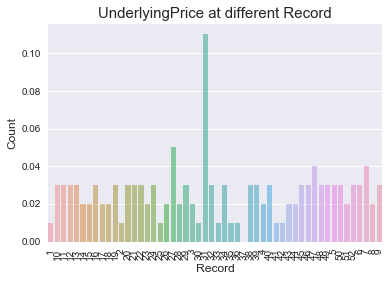

In [195]:
sns.barplot(x=pairs[xlab], y=pairs[ylab], alpha=0.6)
plt.ylabel('Count', fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation='vertical')
plt.title(ylab+" at different "+ xlab, fontsize=15)
plt.show()

Float64Index([49.99, 50.0, 50.01, 50.02, 50.03, 50.04, 50.1], dtype='float64', name='UnderlyingPrice')
[ 1  9 13 25  2  1  1]


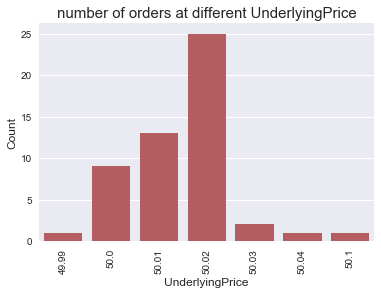

In [196]:
xlab='UnderlyingPrice'
ylab='number of orders'
pairs=rawData.groupby(xlab).size()

print(priceCounts.index)
print(priceCounts.values)
sns.barplot(x=pairs.index, y=pairs.values, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation='vertical')
plt.title(ylab+" at different "+ xlab, fontsize=15)
plt.show()

In [ ]:
# newAsk prices at different times


In [198]:
# line plot of each column as a function of order number
data=rawData[['Record','Time','FieldType','UnderlyingPrice']]
data.head()

,Record,Time,FieldType,UnderlyingPrice
0,1,10:00:00.000,NewBuy,50.00
1,2,10:00:00.000,GenTrade,50.00
2,3,10:00:00.001,NewAsk,50.01
3,4,10:00:00.001,DeleteBuy,50.01
4,5,10:00:00.002,AmendAsk,50.02


In [199]:
data=data.pivot(index='Record',columns='FieldType',values='UnderlyingPrice')
data.head()

FieldType,AmendAsk,AmendBuy,BestAsk,BestBuy,DeleteAsk,DeleteBuy,FirmTrade,GenTrade,NewAsk,NewBuy
Record,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.02
11,NaN,NaN,NaN,50.02,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.02
13,NaN,NaN,NaN,50.02,NaN,NaN,NaN,NaN,NaN,NaN


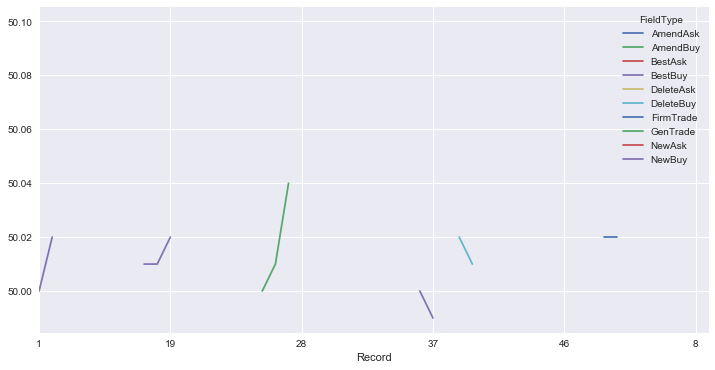

In [200]:
data.plot(figsize=(12,6))

In [201]:
from datetime import datetime
#data['Time']=datetime(rawData['Time']) #wip

msecs = datetime.strptime('10:00:20.300', '%H:%M:%S.%f')
msecs.microsecond/1000

300.0

In [202]:
def get_unique_count(x):
    return len(np.unique(x))

prices=rawData.groupby('UnderlyingPrice').aggregate(get_unique_count)
prices

,Record,Date,Time,OptionSeries,FieldType,BidPrice,BidSize,AskPrice,AskSize,TradeVolume,Price,OrderID
UnderlyingPrice,,,,,,,,,,,,
49.99,1,1,1,1,1,1,1,1,1,1,1,1
50.00,9,1,6,1,4,4,3,2,3,3,3,6
50.01,13,1,10,1,5,5,4,6,4,2,2,11
50.02,25,1,16,1,8,6,8,4,7,3,4,9
50.03,2,1,2,1,1,1,1,1,1,1,2,1
50.04,1,1,1,1,1,1,1,1,1,1,1,1
50.10,1,1,1,1,1,1,1,1,1,1,1,1
